In [95]:
import re

import pickle
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

In [26]:
with open('../../data/clean/misconduct_indicators_train.pkl', 'rb') as train_file:
    misconduct = pickle.load(train_file)

In [33]:
indicated_cols = [
    'misconduct_type',
    'court_type',
    'enforcement_agency',
    'contracting_party'
]

indicator_features = [
    col for col in misconduct.columns
    if re.search(f'^({"|".join(indicated_cols)})_', col)
]

design_matrix = misconduct[[*indicator_features]]
design_matrix = pd.concat(
    [
        design_matrix,
        pd.get_dummies(
            misconduct['disposition_type'],
            prefix='disposition_type'
        )
    ],
    axis=1
)

In [51]:
reduced = TSNE(n_components=2).fit_transform(design_matrix)

(1996, 2)

In [53]:
type(reduced)

numpy.ndarray

In [60]:
reduced.shape

(1996, 2)

In [61]:
target = np.array(misconduct['disposition_type'])
type(target)

numpy.ndarray

In [156]:
target = target.reshape(1996, 1)

In [157]:
labled = np.concatenate(
    (
        reduced,
        target
    ),
    axis=1
)

In [158]:
label_to_color= {
    'Judgment Against Defendant': '#404040',
    'Settlement': '#804000',
    'Fine': '#008040',
    'Pending': '#400080',
    'Investigative Finding': '#408000',
    'Suspend/Debar - Employee': '#004080',
    'Pleaded Guilty': '#800040',
    'Administrative Agreement': '#606000',
    'Non-Prosecution Agreement': '#006060',
    'Restitution': '#600060',
    'Suspend/Debar - Company': '#c00000',
    'Found Guilty': '#00c000',
    'Deferred Prosecution Agreement': '#0000c0'
}

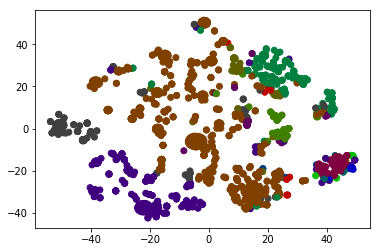

In [159]:
plt.scatter(
    labled[:, 0],
    labled[:, 1],
    c=colors
)

In [169]:
display(HTML(
    ''.join([
        f'<div style="font-size: 10px; color: #ffffff; height: 16px; width: 200px; background-color: {label_to_color[label]}; position: inline">{label}</div>'
        for label
        in list(label_to_color.keys())
    ])
))